<a href="https://colab.research.google.com/github/VanshGupta18/machine-learning/blob/main/ml_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM ASSIGNMENT**

---



The Iris dataset is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width). Use SVC from sklearn.svm on the Iris dataset and follow the steps below:

a) Load the dataset and perform train–test split (80:20).

b) Train three different SVM models using the following kernels:
Linear, Polynomial (degree=3), RBF

c) Evaluate each model using:
• Accuracy
• Precision
• Recall
• F1-Score

d) Display the confusion matrix for each kernel.

e) Identify which kernel performs the best and why.

--- Linear kernel ---
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    1.0000    1.0000        10
   virginica     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

--- Polynomial(deg=3) kernel ---
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    0.9000    0.9474        10
   virginica     0.9091    1.0000    0.9524        10

    accuracy                         0.9667        30
   macro avg     0.9697    0.9667    0.9666        30
weighted avg     0.9697    0.9667    0.9666        30

Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

--- RBF kernel ---
              precision    recall  f1-score   supp

,Accuracy,Precision_macro,Recall_macro,F1_macro
Kernel,,,,
Linear,1.000000,1.000000,1.000000,1.000000
Polynomial(deg=3),0.966667,0.969697,0.966667,0.966583
RBF,0.966667,0.969697,0.966667,0.966583


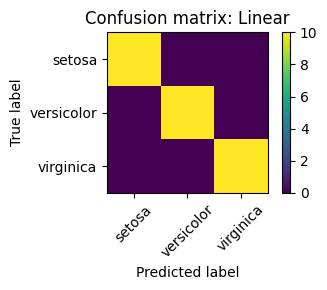

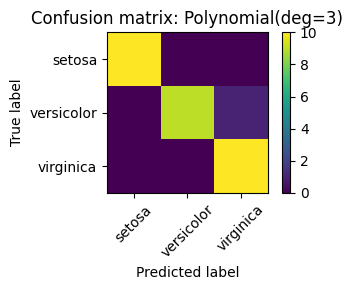

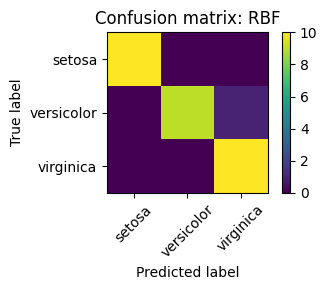

Best by F1_macro: Linear
Best by Accuracy: Linear


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from IPython.display import display

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Linear": SVC(kernel='linear', random_state=42),
    "Polynomial(deg=3)": SVC(kernel='poly', degree=3, random_state=42),
    "RBF": SVC(kernel='rbf', random_state=42)
}

results = []
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    results.append({"Kernel": name, "Accuracy": acc, "Precision_macro": prec_macro, "Recall_macro": rec_macro, "F1_macro": f1_macro})
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    print(f"--- {name} kernel ---")
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    print("Confusion matrix:\n", conf_matrices[name])
    print()

results_df = pd.DataFrame(results).set_index('Kernel')
display(results_df)

for name, cm in conf_matrices.items():
    plt.figure(figsize=(4,3))
    plt.imshow(cm, interpolation='nearest')
    plt.title(f"Confusion matrix: {name}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.colorbar()
    ticks = np.arange(len(target_names))
    plt.xticks(ticks, target_names, rotation=45)
    plt.yticks(ticks, target_names)
    plt.tight_layout()
    plt.show()

best_by_f1 = results_df['F1_macro'].idxmax()
best_by_accuracy = results_df['Accuracy'].idxmax()
print("Best by F1_macro:", best_by_f1)
print("Best by Accuracy:", best_by_accuracy)

SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.

A) Use the Breast Cancer dataset from sklearn.datasets.load_breast_cancer.

B) Train an SVM (RBF kernel) model with and without feature scaling (StandardScaler). Compare both results using:
• Training accuracy
• Testing accuracy

C) Discuss the effect of feature scaling on SVM performance.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from IPython.display import display

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svc_unscaled = SVC(kernel='rbf', random_state=42)
svc_unscaled.fit(X_train, y_train)
y_train_pred_unscaled = svc_unscaled.predict(X_train)
y_test_pred_unscaled = svc_unscaled.predict(X_test)
train_acc_unscaled = accuracy_score(y_train, y_train_pred_unscaled)
test_acc_unscaled = accuracy_score(y_test, y_test_pred_unscaled)

svc_scaled = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
svc_scaled.fit(X_train, y_train)
y_train_pred_scaled = svc_scaled.predict(X_train)
y_test_pred_scaled = svc_scaled.predict(X_test)
train_acc_scaled = accuracy_score(y_train, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, y_test_pred_scaled)

results = pd.DataFrame({
    "Model": ["SVC RBF (unscaled)", "SVC RBF (StandardScaler)"],
    "Train Accuracy": [train_acc_unscaled, train_acc_scaled],
    "Test Accuracy": [test_acc_unscaled, test_acc_scaled]
}).set_index("Model")

display(results)
print("Unscaled classification report (test):")
print(classification_report(y_test, y_test_pred_unscaled, digits=4))
print("Scaled classification report (test):")
print(classification_report(y_test, y_test_pred_scaled, digits=4))

,Train Accuracy,Test Accuracy
Model,,
SVC RBF (unscaled),0.918681,0.929825
SVC RBF (StandardScaler),0.982418,0.982456


Unscaled classification report (test):
              precision    recall  f1-score   support

           0     0.9474    0.8571    0.9000        42
           1     0.9211    0.9722    0.9459        72

    accuracy                         0.9298       114
   macro avg     0.9342    0.9147    0.9230       114
weighted avg     0.9307    0.9298    0.9290       114

Scaled classification report (test):
              precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

